## Getting Data

In [1]:
# importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline

In [23]:
# import the dataset
col_names = ["SepalLengthCM","SepalWidthCM","PetalLengthCM","PetalWidthCM","Class"]
dataset = pd.read_csv('001_Iris/iris.csv',header=None, names = col_names)
dataset.head()

,SepalLengthCM,SepalWidthCM,PetalLengthCM,PetalWidthCM,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Summary of the Dataset

In [10]:
print(dataset.shape)
print(dataset.info())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCM    150 non-null float64
SepalWidthCM     150 non-null float64
PetalLenthCM     150 non-null float64
PetalWidthCM     150 non-null float64
Class            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [11]:
print(dataset.describe())

       SepalLengthCM  SepalWidthCM  PetalLenthCM  PetalWidthCM
count     150.000000    150.000000    150.000000    150.000000
mean        5.843333      3.054000      3.758667      1.198667
std         0.828066      0.433594      1.764420      0.763161
min         4.300000      2.000000      1.000000      0.100000
25%         5.100000      2.800000      1.600000      0.300000
50%         5.800000      3.000000      4.350000      1.300000
75%         6.400000      3.300000      5.100000      1.800000
max         7.900000      4.400000      6.900000      2.500000


In [13]:
# class distribution
print(dataset.groupby("Class").size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Visualization

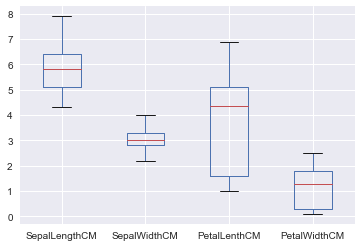

In [16]:
# box and whisker plots
dataset.plot(kind="box", sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17d87128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a17eabe10>]], dtype=object)

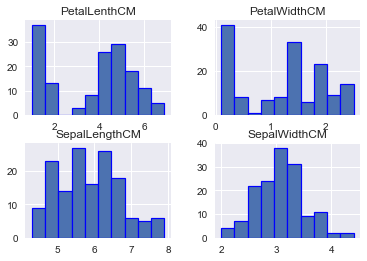

In [20]:
# histogram
dataset.hist(edgecolor="blue",linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17eff1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1809c6d8>]], dtype=object)

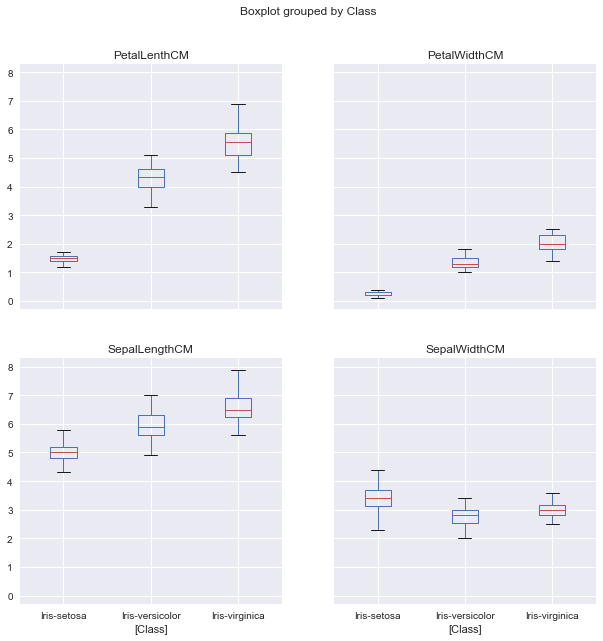

In [21]:
# boxplot on each feature split out by species
dataset.boxplot(by="Class",figsize=(10,10))

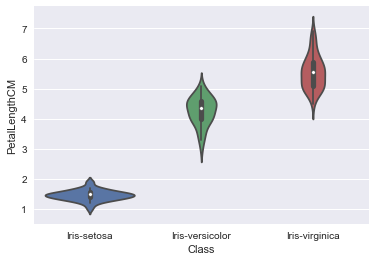

In [24]:
#violinplots on petal-length for each species
sns.violinplot(data=dataset,x="Class",y="PetalLengthCM")

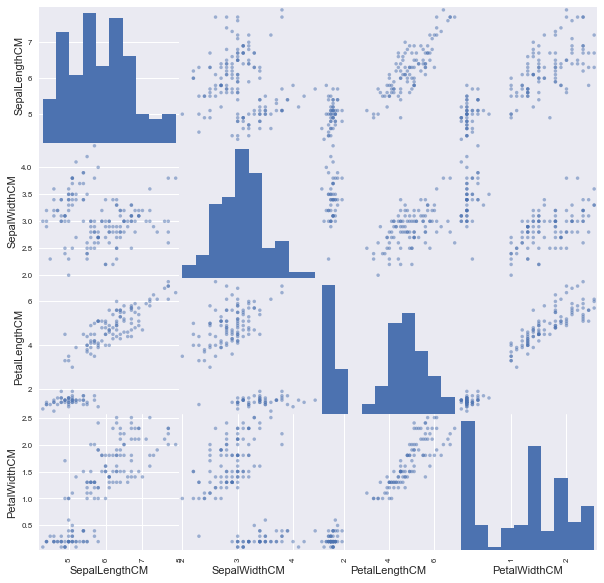

In [26]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

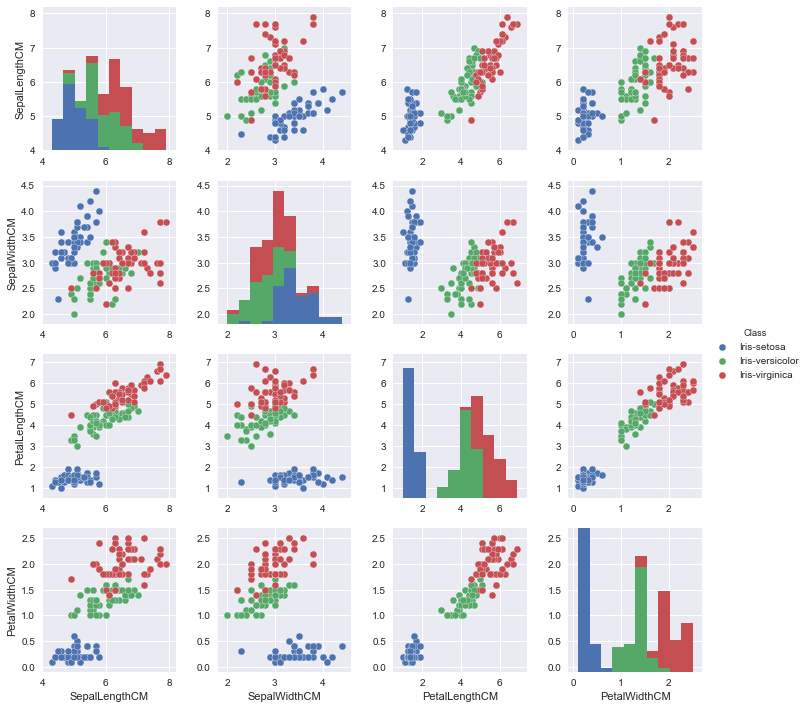

In [27]:
# using seaborn pairplot to see bivariate relation between each pair of features
sns.pairplot(dataset,hue="Class")

we can see that Iris-Setosa is separated from the other two classes

replace the histogram in the pairplot by kde

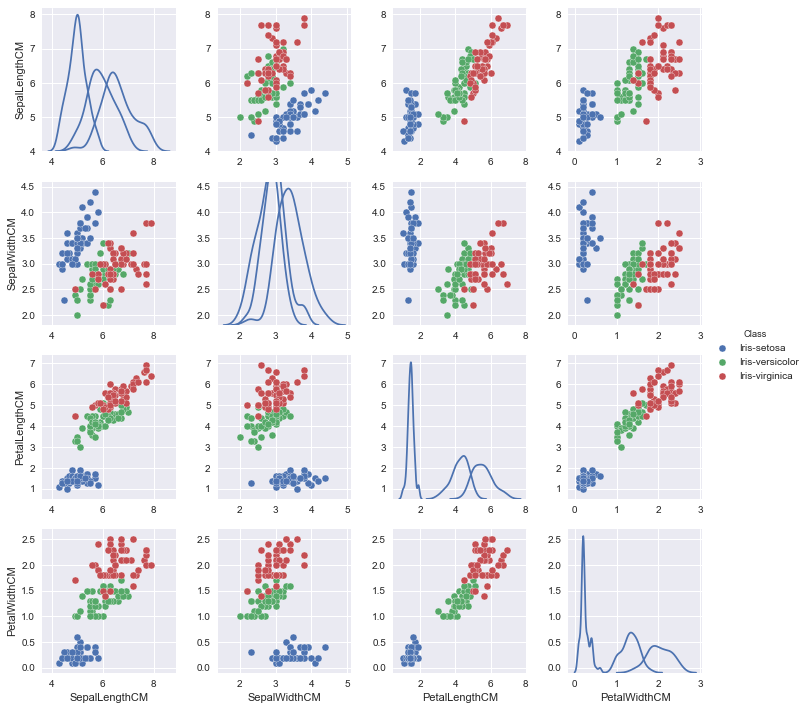

In [31]:
# update diagonal element in the pairplot by kde
sns.pairplot(dataset, hue="Class", diag_kind="kde")

# Applying different classification techniques

In [32]:
# importing matrix for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
# separating the data into dependent and independent variables
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [39]:
# splitting the dataset into Training and Test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/Users/renjith/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy is  0.966666666667


In [53]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is  0.966666666667


In [54]:
# Support Vector Machine
from sklearn.svm import SVC
classifier = SVC()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is  1.0


In [55]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Accuracy is  0.966666666667


In [60]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is  1.0
